# 1. Setup Mario

Install Mario Library

In [1]:
!pip install gym-super-mario-bros==7.3.0


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Install required libraries

In [2]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender
!pip install imageio==2.4.1
!pip install --upgrade AutoROM
!AutoROM --accept-license
!pip install gym

  Using cached imageio-2.28.1-py3-none-any.whl (3.4 MB)
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached imageio-2.4.1-py3-none-any.whl
  Attempting uninstall: imageio
    Found existing installation: imageio 2.28.1
    Uninstalling imageio-2.28.1:
      Successfully uninstalled imageio-2.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] 

Import libraries

In [3]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
# Video Recorder
#from colabgymrender.recorder import Recorder

# Use modified recorder rather than importing from colabgymrender
# Source: https://github.com/ryanrudes/colabgymrender/blob/main/colabgymrender/recorder.py
# Removed the keyword progress_bar which is no longer used

from IPython.core.display import Video, display
from moviepy.editor import *
import time
import cv2
import gym
import os

class Recorder(gym.Wrapper):
    def __init__(self, env, directory, auto_release=True, size=None, fps=None):
        super(Recorder, self).__init__(env)
        self.directory = directory
        self.auto_release = auto_release
        self.active = True

        if not os.path.exists(self.directory):
            os.mkdir(self.directory)

        if size is None:
            self.env.reset()
            self.size = self.env.render(mode = 'rgb_array').shape[:2][::-1]
        else:
            self.size = size

        if fps is None:
            if 'video.frames_per_second' in self.env.metadata:
                self.fps = self.env.metadata['video.frames_per_second']
            else:
                self.fps = 30
        else:
            self.fps = fps

    def pause(self):
        self.active = False

    def resume(self):
        self.active = True

    def _start(self):
        self.cliptime = time.time()
        self.path = f'{self.directory}/{self.cliptime}.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        self._writer = cv2.VideoWriter(self.path, fourcc, self.fps, self.size)

    def _write(self):
        if self.active:
            frame = self.env.render(mode = 'rgb_array')
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            self._writer.write(frame)

    def release(self):
        self._writer.release()

    def reset(self, *args, **kwargs):
        observation = self.env.reset(*args, **kwargs)
        self._start()
        self._write()
        return observation

    def step(self, *args, **kwargs):
        data = self.env.step(*args, **kwargs)
        self._write()

        if self.auto_release and data[2]:
            self.release()

        return data

    def play(self):
        start = time.time()
        filename = 'temp-{start}.mp4'
        clip = VideoFileClip(self.path)
        #clip.write_videofile(filename, progress_bar = False, verbose = False)
        clip.write_videofile(filename, verbose = False)
        display(Video(filename, embed = True))
        os.remove(filename)

/var/folders/xy/pc1nynp1589_1lzrzwtd13_h0000gn/T/ipykernel_895/1498263233.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Video, display


Setup Environment. Display different information about the environment

In [5]:
# Display available movements of Mario
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
# Setup game
#env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = gym_super_mario_bros.make('SuperMarioBros-1-2-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# For recording video
directory = './video'
env = Recorder(env, directory)

In [7]:
# Display number of actions
env.action_space

Discrete(7)

In [8]:
# Display size of frame
env.observation_space.shape

(240, 256, 3)

In [9]:
# Display sample random action
SIMPLE_MOVEMENT[env.action_space.sample()]  # random action


['A']

In [10]:
# Create environment and play with random actions
env.reset()
done = False
while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

env.play()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [11]:
# Close environment
# env.close()

In [12]:
# Reset environment
state = env.reset()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [13]:
# Display sample data per step
env.step(1)  # state

(array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0, 252, 252],
         [  0, 136, 136],
         [  0, 136, 136],
         ...,
         [  0, 136, 136],
         [  0, 136, 136],
         [  0,   0,   0]],
 
        [[  0, 252, 252],
         [  0, 136, 136],
         [  0, 136, 136],
         ...,
         [  0, 136, 136],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0, 136, 136],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [14]:
# Display number of data per step
len(env.step(1))

4

In [15]:
# Display frame data
env.step(1)[0] # screen

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [  0, 136, 136],
        [  0, 136, 136],
        ...,
        [  0, 136, 136],
        [  0, 136, 136],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [  0, 136, 136],
        [  0, 136, 136],
        ...,
        [  0, 136, 136],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 136, 136],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 136, 136]]

In [16]:
# Display Reward
env.step(1)[1] # reward

0.0

In [17]:
# Display info if game is terminated or not
env.step(1)[2] # done or not

False

In [18]:
# Display other step statuses
env.step(1)[3] # other status

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 2,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 41,
 'x_pos_screen': 41,
 'y_pos': 174}

#2. Preprocess Environment

Install library needed for preprocessing

In [19]:
!pip install setuptools==65.5.0


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip install stable_baselines3[extra]


zsh:1: no matches found: stable_baselines3[extra]

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Import libraries needed for preprocessing

In [21]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib to show impact of frame stacking
from matplotlib import pyplot as plt

Create environment and preprocess

In [22]:
#1. Create the base environment
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
#env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = gym_super_mario_bros.make('SuperMarioBros-1-2-v0')

#2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

#3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)

#4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

#5. Stack the frames, 4 frames per step
env = VecFrameStack(env, 4, channels_order='last')


Display frame information after preprocessing

In [23]:
# Display shape of step after preprocessing
state = env.reset()
state.shape

(1, 240, 256, 4)

In [24]:
# Try 1 iteration
state, reward, done, info = env.step([env.action_space.sample()])

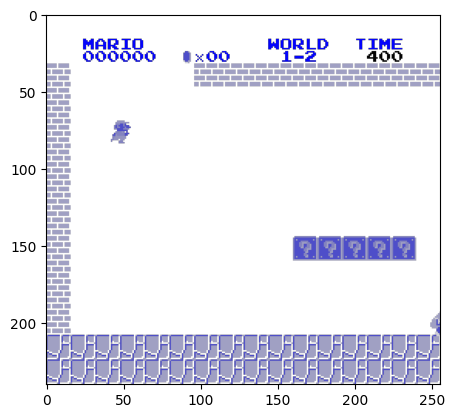

In [25]:
# Display grayscale image 
# There are 4 frames per step so only the first frame is displayed
plt.imshow(state[0])

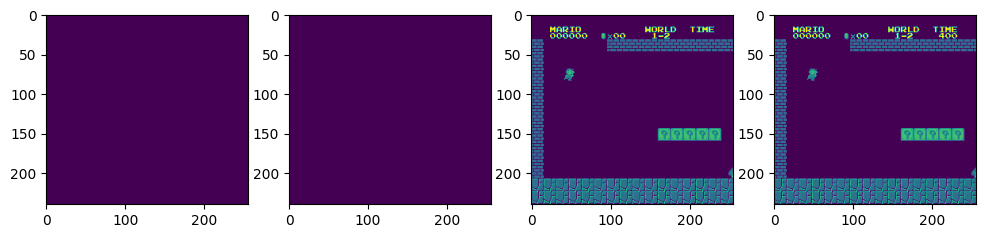

In [26]:
# Display all 4 frames
plt.figure(figsize=(12,10))
for idx in range(state.shape[3]):
  plt.subplot(1,4,idx+1)
  plt.imshow(state[0][:,:,idx])
plt.show()

#3. Train the RL Model

Import libraries needed for training

In [27]:
# Import os for file path management
import os

# Import PPO for algos (the machine learning model)
from stable_baselines3 import PPO

# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

Mount Google Drive

In [28]:
# from google.colab import drive
# #drive.mount('/content/drive')
# drive.mount('/content/gdrive')

In [29]:
CHECKPOINT_DIR = 'models'
LOG_DIR = 'logs'

In [30]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [31]:
!pip install tensorboard


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [32]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=250, save_path=CHECKPOINT_DIR)

Define the model

In [33]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


Load existing model

In [34]:
# selected_model = '/content/gdrive/My Drive/Colab Notebooks/Mario/models/best_model_ver03_1M'
# #model = PPO.load(selected_model)
# model = PPO.load(selected_model, env=env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
#             n_steps=512)

In [35]:
# Tensorflow log

import pathlib
import shutil

#logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
logdir = pathlib.Path("LOG_DIR")
shutil.rmtree(logdir, ignore_errors=True)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

In [36]:
# Train the AI model, this is where the AI model starts to learn
#total_timesteps=1000000
# total_timesteps=5000000

total_timesteps=500
model.learn(total_timesteps=total_timesteps, callback=callback)

Logging to logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 94  |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------


#4. Test it Out

In [37]:
# For recording video
directory = './video'
env = Recorder(env, directory)

In [38]:
# To manually save model
model.save('models/latestmodel')

In [39]:

selected_model = 'models/latestmodel.zip'

In [40]:
model = PPO.load(selected_model)

In [41]:
state = env.reset()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [42]:
state= env.reset()
done = False
while not done:
  action, _ = model.predict(state)
  state, reward, done, info = env.step(action)

env.play()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4
